In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1 = open("train.csv")
file2=open("test.csv")
df1 = pd.read_csv(file1)
df2=pd.read_csv(file2)
df=pd.concat([df1,df2])

In [3]:


df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)
print(df.info())
df.head()

(32296, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB
None


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
df.dropna(inplace=True)

### removing the rows that are having null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  object 
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  float64
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.3+ MB


In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay

In [9]:
#for coverting into regular expressions
import re
import string
# for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# used to convert text into numerical form
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940.0,227540.0,137.0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054.0,128900.0,81.0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523.0,340.0,331.0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568.0,107160.0,167.0


In [11]:
df.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

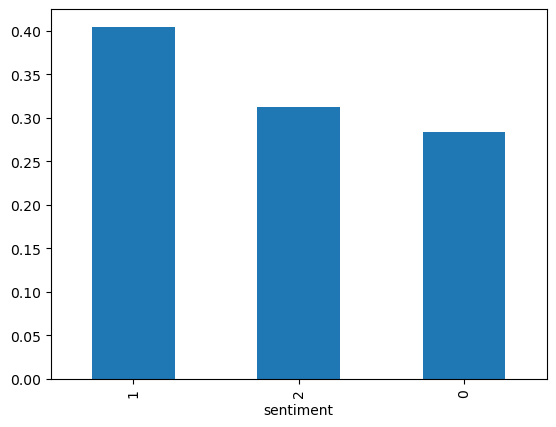

In [12]:
df['sentiment'] = df['sentiment'].astype('category').cat.codes
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [13]:
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,But it was worth it ****.,But it was worth it ****.,2


####text = text.lower(): Converts all characters in the text to lowercase. This is often done to ensure consistency in text processing.

text = re.sub('\[.*?\]', '', text): Uses regular expression (regex) to remove square brackets and their contents from the text. This can be used to remove references or citations often found in brackets.

text = re.sub("\\W"," ",text): Uses regex to replace all non-word characters (e.g., symbols, punctuation, etc.) with a space. This is done to separate words for further processing.

text = re.sub('https?://\S+|www\.\S+', '', text): Uses regex to remove URLs starting with 'http' or 'https', as well as URLs starting with 'www'. This is often done to remove hyperlinks from text.

text = re.sub('<.*?>+', '', text): Uses regex to remove HTML tags from the text. This is useful when dealing with text that contains HTML formatting.

text = re.sub('[%s]' % re.escape(string.punctuation), '', text): Uses regex to remove all punctuation characters from the text. This is done to clean the text and remove unnecessary symbols.

text = re.sub('\n', '', text): Removes newline characters from the text. This is done to ensure that the text is formatted correctly for further processing.

text = re.sub('\w*\d\w*', '', text): Uses regex to remove any words that contain digits. This is often done to remove numbers or alphanumeric characters from the text.

In [14]:
def cp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [15]:
df['selected_text'] = df["selected_text"].apply(cp)

In [16]:
x=df['selected_text']
y=df['sentiment']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

### Text should be converted to the values that are understandable by the computers.so by using vectorization technique we are converting it into computer understandable format.

In [19]:
v= TfidfVectorizer()

In [20]:
vtrain=v.fit_transform(xtrain)
vtest=v.transform(xtest)

In [21]:
lr = LogisticRegression(n_jobs=-1)


In [22]:
lr.fit(vtrain,ytrain)


LogisticRegression(n_jobs=-1)

In [23]:
plr=lr.predict(vtest)


In [24]:
alr = accuracy_score(ytest, plr)
alr

0.8362445414847162

In [26]:

rfc = RandomForestClassifier(random_state=0)
rfc.fit(vtrain, ytrain)

RandomForestClassifier(random_state=0)

In [27]:
pred_rfc = rfc.predict(vtest)
arfc = rfc.score(vtest, ytest)
arfc

0.8122270742358079

#### Hence we obtained 83 percent accuracy using decision tree and 81 percent accuracy using random forest

In [36]:
def output_lablel(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"
    
def testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(cp) 
    new_x_test = new_def_test["text"]
    new_xv_test = v.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lablel(pred_lr[0])))

In [38]:
text = "Iam fine"
testing(text)

The Text Sentement is Positive


### hence the output is obtained manually
